# Desenvolvimento de um modelo

Análise de dados, geralmente usamos o Desenvolvimento de modelos para nos ajudar a prever observações futuras a partir dos dados que temos.

Um modelo nos ajudará a entender a relação exata entre diferentes variáveis ​​e como essas variáveis ​​são usadas para prever o resultado.

### Importando bibliotecas

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Base de Dados

In [83]:
caminho = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
data = pd.read_csv(caminho)
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Regressão linear

É algoritmo preditivo capaz de encontrar uma relação entre duas ou mais variáveis, o modelo basicamente ajusta uma equação linear entre os dados observados.
- Variável preditora **x** 
- Variável dependente do destino **y**

O resultado da regressão linear é uma **função linear** que prediz a variável resposta (dependente) como uma função da variável preditor (independente).

Função linear:

$Y = a + b X$

**a** refere-se à interceptação da linha de regressão em outras palavras: o valor de **Y** quando X é 0

**b** se refere à inclinação da reta de regressão, em outras palavras: o valor com o qual **Y** muda quando **X** aumenta em 1 unidade

### Biblioteca

In [84]:
from sklearn.linear_model import LinearRegression

# Criando o objeto regressão linear
lr = LinearRegression()

### Exemplos 

#### Ex 1.:
Queremos ver como o highway-mpg pode nos ajudar a prever o preço do carro. Usando regressão linear simples, criaremos uma função linear com "highway-mpg" como variável preditora e "price" como variável de resposta.

In [85]:
X = data[['highway-mpg']]
Y = data[['price']]

Ajustando o modelo para variável **highway-mpg**

In [86]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Podemos analisar algumas caracteríticas como o preditor, a intercepção e a inclinação.

**Preditor**

In [87]:
y = lr.predict(X)
y[:3]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179]])

**Intercepção** (a)

In [88]:
lr.intercept_

array([38423.30585816])

**Inclinação** (b)

In [89]:
lr.coef_

array([[-821.73337832]])

### Qual é o modelo linear estimado final que obtemos?
Como vimos acima, devemos obter um modelo linear final com a estrutura:

$
Y = a + b X
$

Conectando os valores reais que obtemos:

$a = 38423.31$

$b = - 821,73$

$Y = price$

$X = highway-mpg$

Substituindo: 

$Y = a + b X$

$price = 38423.31 + (- 821,73 * highway-mpg)$ 

##  Regresão Linear Múltipla

É muito semelhante à regressão linear simples, mas esse método é usado para explicar a relação entre uma variável de resposta contínua (dependente) e duas ou mais variáveis ​​preditoras (independentes). A maioria dos modelos de regressão do mundo real envolve múltiplos preditores.

Função Linear Múltipla:

$Y = a + b_1 X_1 + b_2X_2+ b_3X_3+...+b_nX_n$


### Exemplo :
 Vamos desenvolver um modelo utilizando 4 variáveis ​​preditivas, que são boas variáveis Preditivas, no qual foram observadas no Notebook de Analise Exploratória de dados:

1. Horsepower
2. Curb-weight
3. Engine-size
4. Highway-mpg


In [90]:
Z = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
X = data['price']

Ajustando o modelo para a variável **'price'**

In [91]:
lr.fit(Z,X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Podemos analisar algumas caracteríticas como o preditor, a intercepção e a inclinação.

**Preditor**

In [92]:
 y = lr.predict(Z)
 y[:3]

array([13699.11161184, 13699.11161184, 19051.65470233])

**Intercepção** $(a)$

In [93]:
lr.intercept_

-15806.62462632922

**Inclinação** $(b_1,b_2,b_3,b_4)$

In [94]:
lr.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### Qual é o modelo linear estimado final que obtemos?
Como vimos acima, devemos obter um modelo linear final com a estrutura:


$Y = a + b_1 X_1 + b_2X_2+ b_3X_3+b_4X_4$


Conectando os valores reais que obtemos:

$a = -15806.62462632922 $

$b_1 = 53.49574423$

$b_2 =  4.70770099$

$b_3 = 81.53026382$

$b_4 = 36.05748882$


$Y = price$

$ x_1 = horsepower $ 

$ x_2 = curb-weight $

$ x_3 = engine-size $

$ x_4 = highway-mpg $

### Substituindo: 

$Y = a + b_1 X_1 + b_2X_2+ b_3X_3+b_4X_4$

$price = -15806.62462632922 + (53.49574423 * horsepower) + (4.70770099 * curb-weight) + (81.53026382 * engine-size) + (36.05748882 * highway-mpg)$ 

## Avaliação do Modelo a partir de Visualização Gráfica 

Agora que desenvolvemos alguns modelos, como avaliamos nossos modelos e como escolhemos o melhor? Uma maneira de fazer isso é usando a visualização.

### Importação da Biblioteca

In [95]:
import seaborn as sns
%matplotlib inline 

### Gráfico de Regressão

Quando se trata de regressão linear simples, uma excelente maneira de visualizar o ajuste do nosso modelo é usando gráficos de regressão .

Este gráfico mostrará:
 * uma combinação de pontos de dados dispersos (um gráfico de dispersão ); 
 *  a linha de regressão linear ajustada que passa pelos dados.
 
Isso nos fornecerá uma estimativa razoável da relação entre
*  as duas variáveis;
*  a força da correlação;
*  direção (correlação positiva ou negativa).

### Exemplos:

EX 1.:Vamos visualizar highway-mpg como variável preditora potencial de price:

In [96]:
largura = 12
altura = 10

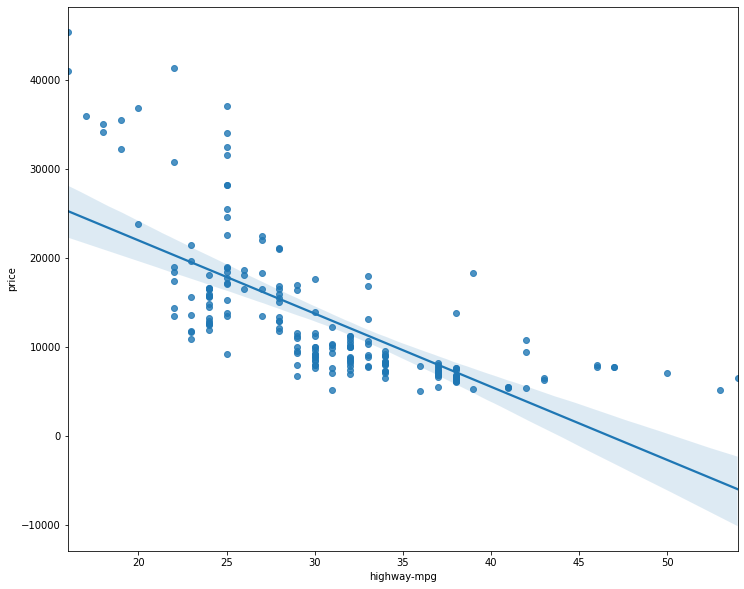

In [97]:
plt.figure(figsize=(largura,altura))
sns.regplot(x='highway-mpg',y='price', data=data)

Vamos verificar a correlação :

In [98]:
data[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Podemos ver neste gráfico que o price está correlacionado negativamente com a highway-mpg, uma vez que a inclinação da regressão é negativa.

Uma coisa importante é  analisar um gráfico de regressão é prestar atenção à dispersão dos pontos de dados ao redor da linha de regressão. Isso fornecerá uma boa indicação da variação dos dados e se um modelo linear seria o mais adequado ou não.
 
Se os dados estiverem muito distantes da linha, esse modelo linear pode não ser o melhor modelo para esses dados. 

EX 2.:   Vamos comparar esse gráfico com o gráfico de regressão de "peak-rpm".

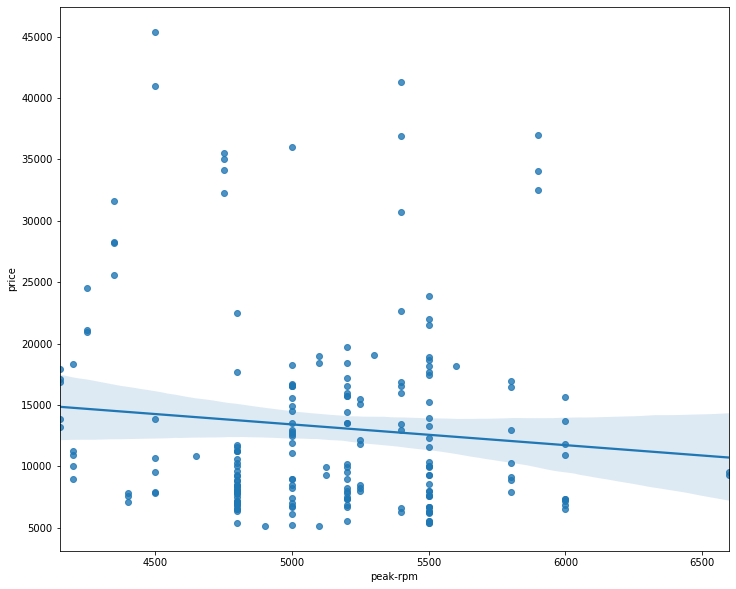

In [99]:
plt.figure(figsize=(largura,altura))
sns.regplot(x='peak-rpm',y='price', data=data)

In [100]:
data[['peak-rpm','price']].corr()


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Comparando o gráfico de regressão de "peak-rpm" e "highway-mpg", vemos que os pontos para "highway-mpg" estão muito mais próximos da linha gerada. Os pontos para "peak-rpm" se espalham mais pela linha prevista e é muito mais difícil determinar se os pontos estão diminuindo ou aumentando à medida que o "highway-mpg" aumenta.

### Gráfico Residual

Uma boa visualização gráfica é utilizando gráfico residual. 

#### O que é um resíduo ?

A diferença entre o valor observado (y) e o valor previsto (F(x)) é chamada de residual (e). Quando olhamos para um gráfico de regressão, o residual é a distância do ponto de dados até a linha de regressão ajustada.

$e = Y - F(x)$

#### Então, o que é um gráfico residual ?

Um gráfico de resíduos é um gráfico que mostra os resíduos no eixo y vertical e a variável independente no eixo x horizontal.

#### A que prestamos atenção quando observamos um gráfico residual?

Observamos a dispersão dos resíduos:

 Se os pontos em um gráfico residual são distribuídos aleatoriamente ao redor do eixo x , um modelo linear é apropriado para os dados.

 Os resíduos distribuídos aleatoriamente significam que a variação é constante e, portanto, o modelo linear é um bom ajuste para esses dados.



 Exemplo.:

 Vamos analizar as variáveis price e highway-mpg

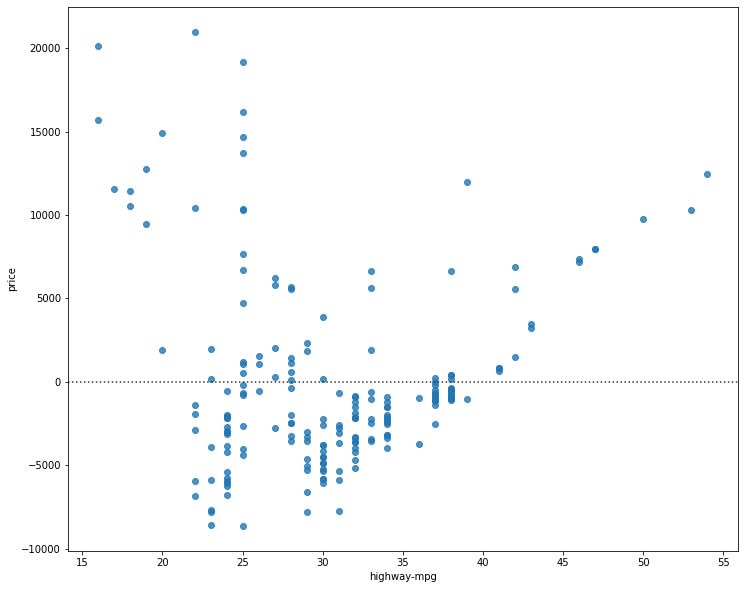

In [101]:
plt.figure(figsize=(largura, altura))
sns.residplot(x='highway-mpg',y='price',data=data)

O que este gráfico nos diz?

Podemos ver a partir desse gráfico residual que os resíduos não estão espalhados aleatoriamente ao redor do eixo x, o que nos leva a acreditar que talvez um modelo não linear seja mais apropriado para esses dados.

### Gráfico de Distribuição

O gráfico de distribuição é utilizado para visualização de Regresão Linear Múltipla, porque não pode ser visualizado com os gráficos anteriores.
Com o gráfico de distribuição : Podemos observar a distribuição dos valores ajustados que resultam do modelo e compará-lo com a distribuição dos valores reais.

Primeiro vamos previsão 

In [102]:
f_x = lr.predict(Z)
f_x[:3]

array([13699.11161184, 13699.11161184, 19051.65470233])

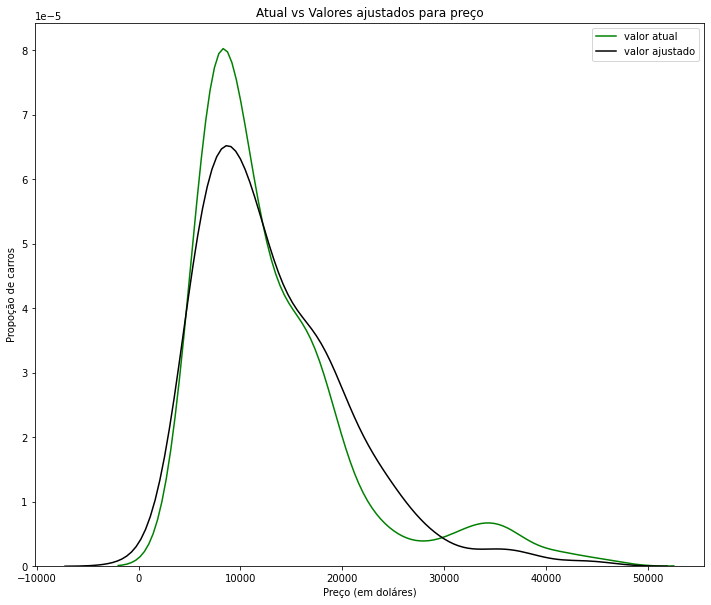

In [103]:
plt.figure(figsize=(largura, altura))

ax1 = sns.distplot(data['price'], hist=False, color="green", label="valor atual")

sns.distplot(f_x, hist=False, color="black", label="valor ajustado" , ax=ax1)

plt.title('Atual vs Valores ajustados para preço')
plt.xlabel('Preço (em doláres)')
plt.ylabel('Propoção de carros')

plt.show()
plt.close()

Podemos ver que os valores ajustados estão razoavelmente próximos dos valores reais, pois as duas distribuições se sobrepõem um pouco. No entanto, há definitivamente algum espaço para melhorias.

## Regressão Polinomial 

A regressão polinomial é um caso particular do modelo de regressão linear geral ou de vários modelos de regressão linear.

Obtemos relacionamentos não lineares ao quadrado ou ao definir termos de ordem superior das variáveis ​​preditoras.

Existem diferentes ordens de regressão polinomial:


$E=a+b_1X^2+b_2X^2+b_3X^3+...+b_nX^n$

Vimos anteriormente que um modelo linear não fornecia o melhor ajuste ao usar highway-mpg como variável preditora. Vamos ver se podemos tentar ajustar um modelo polinomial aos dados.

Usaremos a seguinte função para plotar os dados:

In [104]:
maximo = data[['highway-mpg']].max()
minimo = data[['highway-mpg']].min()
print("Máximo ",maximo)
print("Mínimo ",minimo)

Máximo  highway-mpg    54
dtype: int64
Mínimo  highway-mpg    16
dtype: int64


In [105]:
def PlotPolly(model, x, y, nome):
    #Intervalo baseado no valor minimo e maximo da coluna 'highway-mpg'
    x_new = np.linspace(15, 55, 100)
  
    #Aplica a função polinomial nós pontos criados em x
    y_new = model(x_new)
  
    plt.plot(x, y, '.', x_new, y_new, '-')
   
   #Legendas
    plt.title('Ajuste Polinomial ')
    plt.xlabel(nome)
    plt.ylabel('Preços dos carros')

    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.gcf()
    

    plt.show()
    plt.close()

vamos utilizar as variáveis price e highway-mpg

In [106]:
x = data['highway-mpg']
y = data['price']

Vamos ajustar o polinômio usando a função polyfit  , depois usar a função poly1d para exibir a função polinomial, ambas funções da biblioteca Numpy.

In [107]:
# como parametro passo os eixos e o grau da função 
func = np.polyfit(x,y,3)

#Exibir

exibir = np.poly1d(func)
print(exibir)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


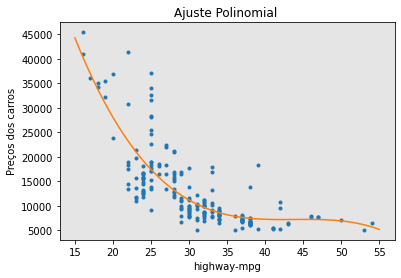

In [108]:
PlotPolly(exibir, x, y, 'highway-mpg')

Já podemos ver na plotagem que esse modelo polinomial tem um desempenho melhor que o modelo linear. Isso ocorre porque a função polinomial gerada "atinge" mais pontos de dados.

#### Gere recursos polinomiais

A expressão analítica da função polinomial multivariada fica complicada,  então devemos gerar uma nova matriz de recurso que consiste em todas as combinações polinomiais dos recursos com grau menor ou igual ao grau especificado. Ou seja,

$$
F(x) = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

Podemos realizar uma transformação polinomial em vários recursos. Primeiro, importamos o módulo:

In [109]:
from sklearn.preprocessing import PolynomialFeatures

Criamos um objeto PolynomialFeatures de grau 2, que por padrão é 2:

In [110]:
pf = PolynomialFeatures()
pf

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

Ajustando os dados e depois transformando-os

In [111]:
Z_pf = pf.fit_transform(Z)

In [112]:
Z.shape

(201, 4)

Os dados originais são de 201 amostras e 4 recursos

In [113]:
Z_pf.shape

(201, 15)

após a transformação, há 201 amostras e 15 recursos.

## Pipeline

Os pipelines de dados permitem transformar dados de uma representação em outra através de uma série de etapas.
Por outro lado, os pipelines apenas transformam os dados observados ( X ).

## Medidas para avaliação dentro da amostra

Ao avaliar nossos modelos, queremos não apenas visualizar os resultados, mas também uma medida quantitativa para determinar a precisão do modelo.

Duas medidas muito importantes que são frequentemente usadas no estatística para determinar a precisão de um modelo são:

* $R^2 $ ou  R-squared

* Mean Squared Error (MSE)

#### **R-squared**


R ao quadrado, também conhecido como coeficiente de determinação, é uma medida para indicar quão próximos os dados estão da linha de regressão ajustada.

O valor do quadrado R é a porcentagem de variação da variável de resposta (y) que é explicada por um modelo linear.

#### **Mean Squared Error (MSE)**

O erro médio quadrático mede a média dos quadrados dos erros, ou seja, a diferença entre o valor real (y) e o valor estimado (ŷ).

Vamos analisar cada modelo abaixo.


### Modelo 1 : Regressão Linear Simples



Vamos calcular o $R​^2$

In [114]:
lr1 = LinearRegression()

x1  = data[['highway-mpg']]
y1 = data[['price']]


lr1.fit(x1,y1)

print("O quadrado de R é ",lr1.score(x1,y1)*100)

O quadrado de R é  49.65911884339176


Podemos dizer que ~ 49,659% da variação do preço é explicada por este modelo linear simples.


Vamos calcular MSE, prevendo a saída , onde X é a variável de entrada:

In [115]:
f_y = lr1.predict(x1)

print("Os quatro primeiros valores é ",f_y[0:4])

Os quatro primeiros valores é  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


Vamos importar a função mean_squared_error do módulo sklearn.metrics,  para compararmos os resultados previstos com os resultados reais.

In [116]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y1,f_y)

print("O erro médio de preço é ",mse)

O erro médio de preço é  31635042.944639888


### Modelo 2 : Regressão Linear Múltipla



Vamos calcular o $R ^2$

In [117]:
Z1 = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y2 = data['price']

lr1.fit(Z1,y2)
print("O R ao quadrado é ",lr1.score(Z1,y2)*100)

O R ao quadrado é  80.93562806577457


Podemos dizer que ~ 80,896% da variação de preço é explicada por essa regressão linear múltipla "multi_fit".

Vamos calcular MSE

In [118]:
f_y2 = lr1.predict(Z1)

mse1 = mean_squared_error(y2,f_y2)

print("O erro médio de preço é ", mse1) 

O erro médio de preço é  11980366.87072649


### Modelo 3: Ajuste Polinomial
 


Vamos importar a função r2_score do módulo sklearn.metrics, pois estamos usando uma função polinomial.

In [119]:
from sklearn.metrics import r2_score

Vamos calcular $R^2$

In [120]:
x3 = data['highway-mpg']
y3 = data['price']

# como parametro passo os eixos e o grau da função 
func1 = np.polyfit(x3,y3,3)

#Exibir

p = np.poly1d(func1)

r_pol = r2_score(y3,p(x3))
print("O r ao quadrado é ", r_pol*100)


O r ao quadrado é  67.41946663906519


Podemos dizer que ~ 67,419% da variação de preço é explicada por esse ajuste polinomial

Vamos calcular MSE

In [121]:
mean_squared_error(y3,p(x3))

20474146.426361218

##  Previsão e Tomada de Decisão

### Predict 

Anteriormente, treinamos o modelo usando o método **fit** . Agora usaremos o método **predict** para produzir uma predição. 

Plotagem do gráfico

<code>.arange()</code> = Os valores são gerados dentro do intervalo semiaberto.

<code>.reshape()</code> = Dá uma nova forma a uma matriz sem alterar seus dados.

In [ ]:
novos_valores = np.arange(1,100,1).reshape(-1,1)

In [123]:
x4 = data[['highway-mpg']]
y4 = data[['price']]

In [124]:
lr1.fit(x4,y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
f_y3 = lr1.predict(novos_valores)

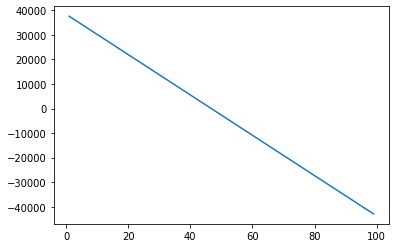

In [126]:
plt.plot(novos_valores, f_y3)

## Considerações Finais
Agora que visualizamos os diferentes modelos e geramos os valores de R ao quadrado e MSE para os ajustes, como determinamos um bom ajuste do modelo?

### O que é um bom valor ao quadrado R?
Ao comparar modelos, o modelo com o maior valor do quadrado R é o melhor ajuste para os dados.

### **O que é um bom MSE?**
Ao comparar modelos, o modelo com o menor valor MSE é mais adequado para os dados.

Vamos dar uma olhada nos valores para os diferentes modelos.

### **Regressão linear simples:**

usando Highway-mpg como uma variável preditora de PRICE.

* $R^2$: 0.49659118843391759

* MSE: $3,16 * 10 ^ 7$

### **Regressão linear múltipla:**
usando Highway-mpg, peso médio, tamanho do motor e estrada-mpg como variáveis ​​preditoras de preço.

* $R^2$: 0.80896354913783497
* MSE: $1,2 * 10^7$

### **Ajuste polinomial:**
Usando Highway-mpg como uma variável preditora de preço.

* $R^2$: 0,6741946663906514

* MSE: $2,05 * 10 ^ 7$

### **Modelo de regressão linear simples (SLR) vs modelo de regressão linear múltipla (MLR)**

Normalmente, quanto mais variáveis ​​você tiver, melhor será o seu modelo em prever, mas isso nem sempre é verdade. Às vezes, você pode não ter dados suficientes, pode encontrar problemas numéricos ou muitas das variáveis ​​podem não ser úteis e até agir como ruído. Como resultado, você deve sempre verificar o MSE e $R^2$.

Para poder comparar os resultados dos modelos MLR vs SLR, analisamos uma combinação do quadrado do R e do MSE para obter a melhor conclusão sobre o ajuste do modelo.

**MSE** :  O MSE do SLR é $3.16*10 ^ 7$ enquanto o MLR tem um MSE de $1.2 * 10 ^ 7$. O MSE da MLR é muito menor.

**$R^2$** : Nesse caso, também podemos ver que há uma grande diferença entre o $R^2$ da SLR e o $R^2$ da MLR.O $R^2$ para o SLR (~ 0,497) é muito pequeno comparado ao $R^2$ para o MLR (~ 0,809).O $R^2$ em combinação com o MSE mostra que a MLR parece ser o melhor modelo adequado neste caso, em comparação com a SLR.


### **Modelo linear simples (SLR) vs ajuste polinomial**
MSE : Podemos ver que o Polynomial Fit derrubou o MSE, pois esse MSE é menor que o da SLR.

$R^2$ : o R-quadrado para o Polyfit é maior que o R-quadrado para a SLR, então o Polynomial Fit também trouxe o R-quadrado bastante.

Como o ajuste polinomial resultou em um MSE mais baixo e um $R^2$ mais alto, podemos concluir que esse era um modelo de ajuste melhor do que a regressão linear simples para prever o preço com Highway-mpg como variável preditora.

### **Regressão linear múltipla (MLR) vs ajuste polinomial**

MSE : O MSE para o MLR é menor que o MSE para o ajuste polinomial.

$R^2$: O $R^2$ para a MLR também é muito maior do que para o ajuste polinomial.

### **Conclusão:**
Comparando esses três modelos, concluímos que o modelo MLR é o melhor modelo para poder prever o preço do nosso conjunto de dados. Esse resultado faz sentido, já que temos 27 variáveis ​​no total e sabemos que mais de uma dessas variáveis ​​são preditores em potencial do preço final do carro.